In [1]:
pip install opencv-contrib-python

   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   ---- ----------------------------------- 5.2/45.5 MB 39.8 MB/s eta 0:00:02
   ---------- ----------------------------- 11.8/45.5 MB 33.5 MB/s eta 0:00:02
   ------------- -------------------------- 15.7/45.5 MB 29.1 MB/s eta 0:00:02
   ---------------- ----------------------- 18.9/45.5 MB 24.8 MB/s eta 0:00:02
   ------------------ --------------------- 21.2/45.5 MB 23.1 MB/s eta 0:00:02
   --------------------- ------------------ 24.1/45.5 MB 20.4 MB/s eta 0:00:02
   ------------------------ --------------- 27.5/45.5 MB 19.6 MB/s eta 0:00:01
   --------------------------- ------------ 30.9/45.5 MB 19.2 MB/s eta 0:00:01
   ----------------------------- ---------- 34.1/45.5 MB 18.8 MB/s eta 0:00:01
   --------------------------------- ------ 37.7/45.5 MB 18.6 MB/s eta 0:00:01
   ------------------------------------ --- 41.4/45.5 MB 18.4 MB/s eta 0:00:01
   ---------------------------------------  44.8/45.5 MB 18.3 

In [1]:
import cv2 as cv

In [11]:
# opencv does not have an inbuilt way of dealing with images that are far larger than the computer screen. There are ways to mitigate this by
# re-sizing and re-scaling the image

In [2]:
#reading and displaying images
img = cv.imread('D:/Datasets/Python Modeling/Kaggle-OpenCV/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg')
cv.imshow('bone', img)
cv.waitKey(0)

-1

In [3]:
# works for images, videos and livevideos - to cahnge the resolution/size
def rescaleFrame(frame, scale=0.75):
    width = int(frame.shape[0] * scale)
    height = int(frame.shape[1] * scale)
    dimensions = (width, height)
    return cv.resize(frame, dimensions, interpolation = cv.INTER_AREA)

# works only on live videos - to change the resolution/size
def changeRes(width,height):
    capture.set(3,width)
    capture.set(4,height)

In [4]:
resized_image = rescaleFrame(img)
cv.imshow('image', resized_image)

In [14]:
# reading and displaying videos
capture = cv.VideoCapture('D:/Datasets/Python Modeling/Kaggle-OpenCV/Yoga/yo.mp4') #this takes in values - 0(webcam),1(1st connected camera),2 (2nd camera) ,3 etc. (if you are using your camera/webcan that is connected to your computer.) or a path to a video file
# in case of reading videos we use a while loop and read the video frame by frame
while True:
    isTrue, frame = capture.read()
    cv.imshow('Video', frame)
    if cv.waitKey(20) & 0xFF==ord('d'):  #this says - if the letter d is pressed then break out of this loop and shot displaying the video
        break

capture.release()
cv.destroyAllWindows()

In [5]:
# reading and displaying resized videos
capture = cv.VideoCapture('D:/Datasets/Python Modeling/Kaggle-OpenCV/Yoga/yo.mp4')

while True:
    isTrue, frame = capture.read()
    cv.imshow('Video', frame)
    frame_resized = rescaleFrame(frame, scale = .2) #since scale is already mentioned as 0.75, no need to mention another scale value as .2
    cv.imshow('Video Resized', frame_resized)
    if cv.waitKey(20) & 0xFF==ord('d'):  #this says - if the letter d is pressed then break out of this loop and shot displaying the video
        break

capture.release()
cv.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [3]:
# how to draw and write on images - 2 types - write on the same image or create a blank/dummy image and write on it
import numpy as np
import cv2 as cv

blank = np.zeros((500,500,3),dtype='uint8') # uint8 is the datatype of an image; 500,500,3 is the shape of height, width and color channel
cv.imshow('blank', blank)

# paint the image a certain color
# blank[:] = 0,255,0
# cv.imshow('green', blank)

# blank[:] = 0,0,255
# cv.imshow('red', blank)

# 1. color a certain portion of the image by giving it a range of pixels
# blank[200:300, 300:400] = 0,0,255
# cv.imshow('red', blank)

# 2. draw a rectangle
# cv.rectangle(blank, (0,0), (250,500), (0,0,255), thickness=2) # blank, from origin point (0,0), to point 2 (250,250)
# cv.imshow('rectangle',blank)

# 2. draw a filled rectangle
# cv.rectangle(blank, (0,0), (250,500), (0,255,0), thickness=cv.FILLED) # blank, from origin point (0,0), to point 2 (250,250)
# cv.imshow('rectangle',blank)
# OR
# cv.rectangle(blank, (0,0), (250,500), (0,255,0), thickness=-1) # blank, from origin point (0,0), to point 2 (250,250)
# cv.imshow('rectangle',blank)
# OR
# cv.rectangle(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (0,255,0), thickness=-1) # instead of passing fixed length we can replace the "//2"
# # by "//1" to change the way it is colored
# cv.imshow('rectangle',blank)

# 3. Draw a Circle
cv.circle(blank, (250,250), 100, (0,0,255), thickness=-1) # syntax - img, center, redius (in pixles), color, thickness, linetype, shift
cv.imshow('circle', blank)

# 4. Draw a line
cv.line(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (255,255,255), thickness=3) # syntax - img, pt1, pt2, color, thickness, linetype, shift
cv.imshow('line',blank)

# 5. Write text on the image
cv.putText(blank, "HELLO", (225,225), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0),2)  #syntax - img, text, org, fontFace, fontScale, color, thickness, linetype, bottomLeftOrigin
cv.imshow('text', blank)

cv.waitKey(0)

-1

In [12]:
# 5 Essential Functions in OpenCV
import cv2 as cv

img = cv.imread('C:/Users/hp/Downloads/ProfilePicture2.jpg')
cv.imshow('me', img)

# 1. Converting an image to greyscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # syntax - source, code, dst, dstcn
cv.imshow('gray', gray)

# 2. Blur the image
blur = cv.GaussianBlur(img, (9,9), cv.BORDER_DEFAULT)  # syntax - src, ksize (kernal size - has to be an odd number, increase for more bluring), sigmaX, dst, sigmaY, borderType
cv.imshow('blur', blur)

# 3. Create Edge Cascade
canny = cv.Canny(img, 125, 175)  # syntax - image, threshold1, threshold2, edges, apertureSize, L2gradient
cv.imshow('canny', canny) # in the cv.Canny code replace the img variable with blur, to reduce the number or edge lines

# 4. Dilating the image
dilated = cv.dilate(canny, (7,7), iterations=3) # syntax - src, dst, anchor, iterations, borderType, borderValue (increase the kernal size and iterations to see more difference in the output image
cv.imshow('dilated', dilated)

# 5. Eroding - the dilated image to get a sharper image
eroded = cv.erode(dilated, (7,7), iterations=3) # syntax - src, kernel, dst, anchor, iterations, borderType, borderValue
cv.imshow('eroded', eroded)

# 6.1. Resize and Crop the image
resized = cv.resize(img, (500,500), interpolation=cv.INTER_CUBIC)  #syntax - src, dsize(destination size), dst, fx, fy,
# interpolation; by default there is an interpolation that occurs in the background
# cv.INTER_AREA is useful if you are shrinking the image to dimensions that are smaller than that of the original dimensions
# But in some cases if you are trying to inlarge the image into a much larger dimension you will use the INTER_LINEAR or INTER_CUBIC
# cubic is slowest amongst them all but the image you get is of a much higher quality than other options
cv.imshow('resized', resized)

# 6.2. Cropping
cropped = img[50:200, 200:400]
# images are arrays, and we can imploy array slicing, we can select a portion of the image on the basis of your pixel value
cv.imshow('cropped', cropped)

cv.waitKey(0)

-1

In [8]:
# IMAGE TRANSFORMATIONS - translation, rotation, resizing, flipping and cropping.
import cv2 as cv
import numpy as np

img = cv.imread('C:/Users/hp/Downloads/ProfilePicture2.jpg')
cv.imshow('me', img)

# 1. TRANSLATION - shifting an image along the x and y axis
def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]]) # creating a translation matrix
    dimensions = (img.shape[1], img.shape[0]) # get the dimensions of the image which is a tuple of width and length
    return cv.warpAffine(img,transMat, dimensions)  # syntax - src, M(matrix), dsize(dimension), dst, flags=, borderMode=, borderValue

# -x ---> negative value of x, translating the image to the LEFT
# -y ---> UP
# +x ---> RIGHT
# +y ---> DOWN

translated = translate(img, 100, 200) # image shifted by a 100 pixels to the right and 200 pixles down
cv.imshow('translated', translated)

# 2. ROTATION - rotating the image by some angle
def rotate(img, angle, rotPoint=None):
    (height, width) = img.shape[:2]
    if rotPoint is None:
        rotPoint = (width//2, height//2)
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0) # syntax - center(rotation point), angle(angle to rotate around), scale(value to scale the image)
    dimensions = (width, height)
    return cv.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, 45)
cv.imshow('rotated', rotated)

# 3. Resize
resized = cv.resize(img, (500,500), interpolation = cv.INTER_AREA)
cv.imshow('resized', resized)

# 4. FLIPPING
flip = cv.flip(img, -1)  # syntax - src, flip, dst=none
cv.imshow('flipped',flip)

# 0 ---> flipping the image vertically over the x axis
# 1 ---> flip the image horizontally over the y axis
# -1 ---> flipping both vertically and horizontally

# 5. CROPPING
cropped =img[200:400, 300:400]
cv.imshow('cropped', cropped)

cv.waitKey(0)

-1

In [4]:
# CONTOUR DETECTION
import cv2 as cv
import numpy as np

img = cv.imread('C:/Users/hp/Downloads/ProfilePicture2.jpg')
cv.imshow('me', img)

blank = np.zeros(img.shape, dtype='uint8')
cv.imshow('blank', blank)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('gray', gray)

# blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
# cv.imshow('blur', blur)

canny = cv.Canny(img, 125, 175) # Canny Edge detector
cv.imshow('canny', canny)

# threshholding looks at an image and tries to binarize it
# if the density of an image is below 125, it is going to be set to 0 or black, if it is above 125, it is going to be set to white(255)
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)  # syntax - src, threshold, maxval, type, dst=none
cv.imshow('thresh', thresh)

# it returns 2 - countours and hierarchies
# countours - is essentially a Python list of all the coordinates of all the contours
# hierarchied - represents the hierarchical representation of contours. triangle, inside it a square, inside it a circle, etc.
contours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)  # syntax - image, mode, method, contours=none, hierarchy=none, offset=none
print(f'{len(contours)} contour(s) found!')
# from 1441 the countour count reduced to 299
# there are 5 contours to check from

cv.drawContours(blank, contours, -1, (0,0,255), 1) # syntax - image, contours, contourIdx(how many contours do you want in an image), color, thickness=none, lineType=none, hierarchy=none, maxLevel=none, offset=none
cv.imshow('contour lines', blank)

# general recomendation is thet you use canny method first, and then try and find the contours using that rather than trying to threshold the image and
# then find the contours of that
# contours of an image is the mirror image of it's canny self

cv.waitKey(0)

672 contour(s) found!


-1

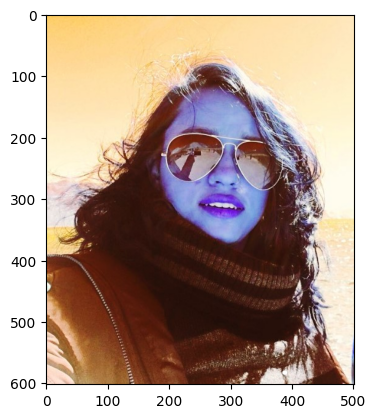

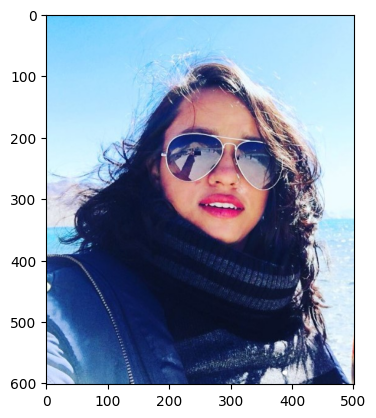

-1

In [10]:
# COLOR SPACES
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('C:/Users/hp/Downloads/ProfilePicture2.jpg')
cv.imshow('me',img)

plt.imshow(img) # this is an RGB image inverse to BGR in OpenCV
plt.show()

# BGR to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('rgb', rgb)

plt.imshow(rgb) # this is an RGB image inverse to BGR in OpenCV
plt.show()

# BGR to GRAY scale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('gray', gray)

# BGR to HSV (how humans percieve colors
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('hsv', hsv)

#BGR to LAB
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('lab', lab)

# RGBA = cv.cvtColor(img, cv.COLOR_BGR2RGBA)
# cv.imshow('RGBA', RGBA)

# hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)
# cv.imshow('hls', hls)

# xyz = cv.cvtColor(img, cv.COLOR_BGR2XYZ)
# cv.imshow('xyz', xyz)

# we can do the inverse of all in OpenCV i.e. from LAB to BGR and HSV to BGR or Gray to BGR, but you cannot convert HSV to grayscale directly
hsv_bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
cv.imshow('hsv to bgr', hsv_bgr)

cv.waitKey(0)

In [11]:
# COLOR CHANNELS
import cv2 as cv
import numpy as np

img = cv.imread('C:/Users/hp/Downloads/ProfilePicture2.jpg')
cv.imshow('me',img)

# an image basically consists of three channels - red, green and blue, OpenCV allows you to split an image into it's different color channels
b,g,r = cv.split(img)
cv.imshow('Blue',b)
cv.imshow('Green',g)
cv.imshow('Red',r)

print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)


cv.waitKey(0)

(602, 502, 3)
(602, 502)
(602, 502)
(602, 502)


-1